# Part 2 :  Exploratory Data Analysis

## 1. Introduction

After the data cleaning step where we put our data into a few standard formats, the next step is to take a look at the data and see if what we're looking at makes sense. Before applying any fancy algorithms, it's always important to explore the data first.

We are going to look at the following for each comedian:

1. **Most common words** - find these and create word clouds
2. **Size of vocabulary** - look number of unique words and also how quickly someone speaks
3. **Amount of profanity** - most common terms

## 2. Most Common Words

### 2.1.  Read in the document-term matrix

In [1]:
# Read in the document-term matrix
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
data = pd.read_pickle('../data/dtm.pkl')
data = data.transpose()
data

ali  anthony  bill  bo  dave  hasan  jim  joe  john  \
aaaaah                    0        0     1   0     0      0    0    0     0   
aaah                      0        0     0   0     1      0    0    0     0   
aah                       0        0     0   0     0      0    0    0     0   
abc                       1        0     0   0     0      0    0    0     0   
abcs                      0        0     1   0     0      0    0    0     0   
ability                   0        0     0   0     0      0    0    0     0   
abject                    0        0     0   0     0      0    0    0     0   
able                      2        0     1   0     0      0    1    2     3   
ablebodied                0        0     0   0     0      0    2    0     0   
abortion                  0        2     0   0     0      0    0    0     0   
abortions                 0        0     0   0     1      0    0    0     0   
abroad                    0        0     0   0     0      0    3    0     0   
absolute                  0        0     1   0     0      0    0    0     0   
absolutely                0        0     3   0     0      0    0    0     1   
absorb                    0        0     1   0     0      0    0    0     0   
absorbing                 1        0     0   0     0      0    0    0     0   
abuse                     1        0     0   0     0      0    0    1     0   
abused                    2        0     0   0     0      0    0    0     0   
accent                    0        1     0   0     0      0    4    1     1   
accents                   0        0     0   0     0      0    0    1     0   
accept                    0        0     0   0     0      0    0    0     0   
acceptable                0        0     1   0     0      0    0    0     1   
accepted                  0        0     0   0     0      0    0    1     0   
access                    0        0     0   0     0      0    0    0     2   
accident                  1        0     0   0     0      0    0    0     0   
accidentally              1        1     2   0     0      0    0    1     0   
accomplished              0        0     0   0     0      0    0    0     1   
according                 2        0     0   0     0      0    0    0     0   
accoutrements             0        0     0   0     0      0    0    0     1   
accurate                  0        0     0   0     0      0    0    0     0   
accustomed                0        0     0   0     1      0    0    0     0   
achieve                   2        0     1   0     0      0    0    0     0   
achievement               0        0     0   0     0      0    0    0     0   
acid                      0        0     0   0     0      0    0    0     0   
acknowledge               0        0     0   0     3      0    0    0     0   
acknowledging             0        0     0   0     0      0    0    0     0   
acquitted                 0        0     0   0     1      0    0    0     0   
act                       1        1     4   0     4      0    4    1     1   
acting                    0        0     0   0     0      0    2    0     0   
actions                   0        0     0   0     1      0    0    0     0   
activate                  0        0     0   0     1      0    0    0     0   
active                    1        0     0   0     0      0    0    0     0   
activity                  1        0     0   0     0      0    0    0     1   
actor                     0        0     0   0     0      0    3    0     0   
actors                    0        0     0   0     0      0    2    0     0   
acts                      0        0     0   0     0      0    1    0     0   
actual                    0        0     0   0     1      0    1    0     0   
actually                  1        7    11   0     5      0    2    3     7   
ad                        0        0     0   0     0      0    0    1     0   
adam                      0        0     0   0     0      0    0    3     

### 2.2. Find the top 30 words said by each comedian

In [3]:
# Find the top 30 words said by each comedian
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

pd.DataFrame(top_dict)

ali        anthony           bill               bo  \
0      (like, 127)       (im, 60)    (like, 202)        (loft, 1)   
1         (im, 74)     (like, 51)    (just, 150)    (reserved, 1)   
2       (know, 65)     (know, 39)   (right, 131)      (rights, 1)   
3       (just, 64)     (dont, 38)      (im, 107)      (scraps, 1)   
4       (dont, 61)     (joke, 35)     (know, 99)      (aaaaah, 0)   
5      (thats, 34)      (got, 34)     (dont, 95)       (poppy, 0)   
6       (shit, 34)    (thats, 31)    (gonna, 77)        (pose, 0)   
7      (youre, 31)     (said, 31)      (got, 72)        (port, 0)   
8      (gonna, 28)  (anthony, 27)  (fucking, 71)       (porny, 0)   
9         (ok, 26)      (day, 26)     (yeah, 67)        (porn, 0)   
10       (lot, 24)     (just, 26)     (shit, 64)        (pork, 0)   
11     (gotta, 21)      (say, 26)    (youre, 59)  (population, 0)   
12        (oh, 21)     (guys, 23)    (thats, 56)     (popular, 0)   
13     (wanna, 21)   (people, 22)     (dude, 40)   (popsicles, 0)   
14   (husband, 20)     (tell, 19)     (want, 36)        (pops, 0)   
15      (time, 19)    (youre, 19)     (fuck, 36)     (popcorn, 0)   
16     (right, 19)  (grandma, 18)    (think, 36)     (popping, 0)   
17       (got, 19)    (right, 18)   (people, 32)    (position, 0)   
18     (cause, 18)    (think, 17)      (hes, 31)         (pop, 0)   
19     (women, 17)     (good, 17)      (did, 31)        (poor, 0)   
20       (day, 17)     (time, 17)    (didnt, 30)        (poop, 0)   
21    (people, 16)    (thing, 17)      (guy, 30)        (poom, 0)   
22  (pregnant, 15)    (jokes, 16)     (make, 28)        (pool, 0)   
23       (god, 14)      (did, 16)     (come, 27)     (poodles, 0)   
24      (need, 14)   (school, 16)    (thing, 26)    (ponytail, 0)   
25       (hes, 14)     (yeah, 16)    (going, 26)       (polls, 0)   
26      (yeah, 13)    (didnt, 15)   (theyre, 25)        (poll, 0)   
27      (tell, 13)     (okay, 15)   (theres, 24)        (posh, 0)   
28      (work, 12)      (ive, 15)      (let, 24)    (positive, 0)   
29    (theyre, 12)     (baby, 15)   (little, 23)   (positions, 0)   

             dave            hasan            jim            joe  \
0     (like, 104)        (loft, 1)    (like, 109)    (like, 144)   
1      (know, 79)    (reserved, 1)      (im, 101)  (people, 100)   
2      (said, 63)      (rights, 1)     (dont, 90)     (just, 87)   
3      (just, 61)      (scraps, 1)    (right, 81)     (dont, 79)   
4        (im, 47)      (aaaaah, 0)  (fucking, 78)   (fcking, 69)   
5      (shit, 46)       (poppy, 0)     (just, 63)       (im, 69)   
6    (people, 43)        (pose, 0)     (went, 63)      (fck, 66)   
7     (didnt, 40)        (port, 0)     (know, 63)    (thats, 62)   
8      (ahah, 38)       (porny, 0)    (youre, 48)    (gonna, 52)   
9      (dont, 38)        (porn, 0)   (people, 44)   (theyre, 49)   
10     (time, 36)        (pork, 0)    (thats, 42)     (know, 46)   
11    (thats, 33)  (population, 0)      (day, 40)    (youre, 42)   
12     (fuck, 33)     (popular, 0)       (oh, 40)    (think, 41)   
13  (fucking, 32)   (popsicles, 0)    (going, 39)     (shit, 40)   
14    (black, 31)        (pops, 0)    (think, 39)      (got, 36)   
15      (man, 31)     (popcorn, 0)     (fuck, 37)   (theres, 34)   
16     (good, 28)     (popping, 0)    (thing, 34)    (right, 31)   
17      (got, 27)    (position, 0)     (goes, 34)      (man, 31)   
18    (right, 22)         (pop, 0)     (said, 32)    (house, 27)   
19    (gonna, 21)        (poor, 0)     (guns, 30)     (kids, 25)   
20      (lot, 20)        (poop, 0)   (theyre, 29)       (oh, 25)   
21      (gay, 20)        (poom, 0)     (good, 29)    (cause, 24)   
22      (did, 19)        (pool, 0)      (ive, 27)    (white, 24)   
23      (hes, 19)     (poodles, 0)      (got, 26)      (say, 23)   
24     (yeah, 19)    (ponytail, 0)    (women, 26)     (life, 23)   
25       (oh, 18)       (polls, 0)    (cause, 26)     (real, 22)   
26       (oj, 18)        (poll, 0)   (t

In [4]:
# Print the top 15 words said by each comedian
for comedian, top_words in top_dict.items():
    print(comedian)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('-----')

ali
like, im, know, just, dont, thats, shit, youre, gonna, ok, lot, gotta, oh, wanna
-----
anthony
im, like, know, dont, joke, got, thats, said, anthony, day, just, say, guys, people
-----
bill
like, just, right, im, know, dont, gonna, got, fucking, yeah, shit, youre, thats, dude
-----
bo
loft, reserved, rights, scraps, aaaaah, poppy, pose, port, porny, porn, pork, population, popular, popsicles
-----
dave
like, know, said, just, im, shit, people, didnt, ahah, dont, time, thats, fuck, fucking
-----
hasan
loft, reserved, rights, scraps, aaaaah, poppy, pose, port, porny, porn, pork, population, popular, popsicles
-----
jim
like, im, dont, right, fucking, just, went, know, youre, people, thats, day, oh, going
-----
joe
like, people, just, dont, fcking, im, fck, thats, gonna, theyre, know, youre, think, shit
-----
john
like, know, just, dont, said, clinton, im, thats, right, youre, little, hey, time, got
-----
louis
like, just, know, dont, thats, youre, im, life, people, thing, gonna, hes,

**NOTE :** At this point, we could go on and create word clouds. However, by looking at these top words, you can see that some of them have very little meaning and could be added to a stop words list, so let's do just that.



### 2.3. Add stop words

In [5]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each comedian
words = []
for comedian in data.columns:
    top = [word for (word, count) in top_dict[comedian]]
    for t in top:
        words.append(t)
        
words

['like',
 'im',
 'know',
 'just',
 'dont',
 'thats',
 'shit',
 'youre',
 'gonna',
 'ok',
 'lot',
 'gotta',
 'oh',
 'wanna',
 'husband',
 'time',
 'right',
 'got',
 'cause',
 'women',
 'day',
 'people',
 'pregnant',
 'god',
 'need',
 'hes',
 'yeah',
 'tell',
 'work',
 'theyre',
 'im',
 'like',
 'know',
 'dont',
 'joke',
 'got',
 'thats',
 'said',
 'anthony',
 'day',
 'just',
 'say',
 'guys',
 'people',
 'tell',
 'youre',
 'grandma',
 'right',
 'think',
 'good',
 'time',
 'thing',
 'jokes',
 'did',
 'school',
 'yeah',
 'didnt',
 'okay',
 'ive',
 'baby',
 'like',
 'just',
 'right',
 'im',
 'know',
 'dont',
 'gonna',
 'got',
 'fucking',
 'yeah',
 'shit',
 'youre',
 'thats',
 'dude',
 'want',
 'fuck',
 'think',
 'people',
 'hes',
 'did',
 'didnt',
 'guy',
 'make',
 'come',
 'thing',
 'going',
 'theyre',
 'theres',
 'let',
 'little',
 'loft',
 'reserved',
 'rights',
 'scraps',
 'aaaaah',
 'poppy',
 'pose',
 'port',
 'porny',
 'porn',
 'pork',
 'population',
 'popular',
 'popsicles',
 'pops',

In [6]:
# Let's aggregate this list and identify the most common words along with how many routines they occur in
Counter(words).most_common()

[('like', 10),
 ('im', 10),
 ('know', 10),
 ('just', 10),
 ('dont', 10),
 ('thats', 10),
 ('right', 10),
 ('people', 10),
 ('youre', 9),
 ('got', 9),
 ('gonna', 7),
 ('think', 7),
 ('didnt', 7),
 ('time', 6),
 ('cause', 6),
 ('hes', 6),
 ('yeah', 6),
 ('theyre', 6),
 ('said', 6),
 ('shit', 5),
 ('oh', 5),
 ('day', 5),
 ('say', 5),
 ('thing', 5),
 ('theres', 5),
 ('really', 5),
 ('good', 4),
 ('fucking', 4),
 ('fuck', 4),
 ('going', 4),
 ('did', 3),
 ('ive', 3),
 ('want', 3),
 ('little', 3),
 ('went', 3),
 ('ok', 2),
 ('lot', 2),
 ('gotta', 2),
 ('women', 2),
 ('tell', 2),
 ('joke', 2),
 ('guys', 2),
 ('dude', 2),
 ('guy', 2),
 ('make', 2),
 ('come', 2),
 ('loft', 2),
 ('reserved', 2),
 ('rights', 2),
 ('scraps', 2),
 ('aaaaah', 2),
 ('poppy', 2),
 ('pose', 2),
 ('port', 2),
 ('porny', 2),
 ('porn', 2),
 ('pork', 2),
 ('population', 2),
 ('popular', 2),
 ('popsicles', 2),
 ('pops', 2),
 ('popcorn', 2),
 ('popping', 2),
 ('position', 2),
 ('pop', 2),
 ('poor', 2),
 ('poop', 2),
 ('poom',

In [7]:
# If more than half of the comedians have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
add_stop_words = add_stop_words + ['said','say', 'yeah', 'rights', 'says', 'jenny']

## 2.4. Update document-term matrix

In [8]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('../data/data_clean.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

# Pickle it for later use
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

InvalidParameterError: The 'stop_words' parameter of CountVectorizer must be a str among {'english'}, an instance of 'list' or None. Got frozenset({'will', 'then', 'hereby', 'part', 're', 'else', 'yourselves', 'seeming', 'just', 'without', 'ie', 'always', 'if', 'show', 'via', 'neither', 'other', 'bill', 'several', 'enough', 'eight', 'there', 'of', 'amount', 'therein', 'either', 'in', 'would', 'also', 'wherever', 'how', 'among', 'off', 'until', 'by', 'nowhere', 'few', 'back', 'everywhere', 'con', 'only', 'have', 'forty', 'mine', 'even', 'being', 'yeah', 'sometime', 'me', 'dont', 'do', 'once', 'out', 'per', 'not', 'know', 'meanwhile', 'whereafter', 'full', 'nevertheless', 'fill', 'ours', 'hers', 'toward', 'alone', 'ltd', 'so', 'may', 'many', 'therefore', 'hence', 'formerly', 'hereupon', 'since', 'every', 'seem', 'same', 'whom', 'twelve', 'sixty', 'another', 'on', 'one', 'over', 'something', 'cannot', 'fifteen', 'becomes', 'before', 'nor', 'un', 'became', 'find', 'across', 'call', 'most', 'yourself', 'think', 'is', 'got', 'up', 'your', 'top', 'beside', 'been', 'because', 'six', 'could', 'from', 'again', 'anyone', 'thru', 'whereas', 'both', 'co', 'our', 'whither', 'as', 'indeed', 'im', 'anything', 'becoming', 'their', 'upon', 'said', 'like', 'whoever', 'nobody', 'whenever', 'whence', 'sometimes', 'latterly', 'well', 'seems', 'whatever', 'what', 'somewhere', 'they', 'any', 'ever', 'found', 'much', 'hundred', 'was', 'after', 'himself', 'cry', 'herself', 'nothing', 'those', 'had', 'below', 'gonna', 'whether', 'down', 'fire', 'however', 'three', 'name', 'describe', 'he', 'mostly', 'whereby', 'elsewhere', 'due', 'each', 'empty', 'none', 'it', 'first', 'here', 'amongst', 'perhaps', 'somehow', 'nine', 'everyone', 'for', 'next', 'thereupon', 'move', 'no', 'my', 'all', 'beyond', 'might', 'during', 'him', 'to', 'thereafter', 'beforehand', 'interest', 'four', 'about', 'too', 'right', 'noone', 'anyway', 'at', 'inc', 'third', 'some', 'above', 'hasnt', 'former', 'often', 'and', 'seemed', 'against', 'cant', 'his', 'i', 'were', 'though', 'latter', 'moreover', 'please', 'rather', 'are', 'who', 'where', 'than', 'has', 'am', 'should', 'otherwise', 'within', 'be', 'anywhere', 'along', 'when', 'must', 'these', 'towards', 'this', 'or', 'system', 'we', 'with', 'the', 'someone', 'itself', 'two', 'rights', 'side', 'yours', 'afterwards', 'mill', 'thick', 'thereby', 'she', 'themselves', 'through', 'sincere', 'that', 'ourselves', 'amoungst', 'keep', 'people', 'couldnt', 'namely', 'detail', 'fifty', 'which', 'etc', 'youre', 'give', 'behind', 'front', 'others', 'under', 'five', 'thin', 'thats', 'throughout', 'myself', 'such', 'into', 'while', 'made', 'take', 'de', 'although', 'say', 'an', 'between', 'didnt', 'thus', 'still', 'ten', 'whole', 'own', 'why', 'already', 'less', 'them', 'serious', 'hereafter', 'further', 'herein', 'together', 'almost', 'bottom', 'very', 'never', 'yet', 'thence', 'last', 'onto', 'a', 'become', 'us', 'get', 'but', 'her', 'more', 'can', 'anyhow', 'now', 'eleven', 'go', 'says', 'jenny', 'put', 'eg', 'except', 'besides', 'around', 'you', 'whereupon', 'see', 'wherein', 'twenty', 'whose', 'least', 'its', 'everything', 'done'}) instead.

## 2.5.  word clouds

In [ ]:
# Let's make some word clouds!
# Terminal / Anaconda Prompt: conda install -c conda-forge wordcloud
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

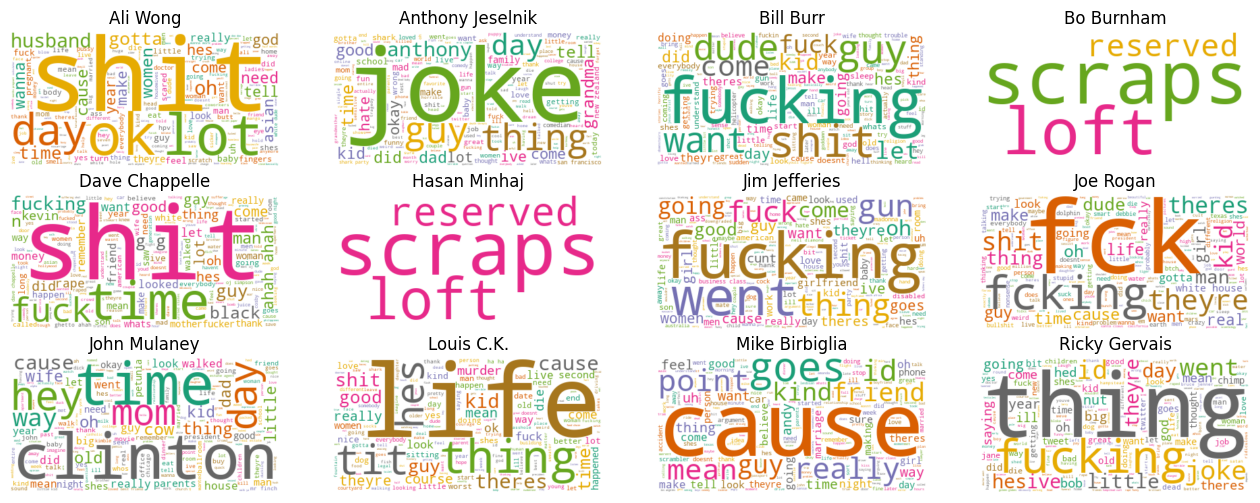

In [ ]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]

full_names = ['Ali Wong', 'Anthony Jeselnik', 'Bill Burr', 'Bo Burnham', 'Dave Chappelle', 'Hasan Minhaj',
              'Jim Jefferies', 'Joe Rogan', 'John Mulaney', 'Louis C.K.', 'Mike Birbiglia', 'Ricky Gervais']

# Create subplots for each comedian
for index, comedian in enumerate(data.columns):
    wc.generate(data_clean.transcript[comedian])
    
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
plt.savefig('../figures/wordcloud.png',
            transparent=True, 
            bbox_inches='tight',
            dpi=None,
            facecolor='w',
            edgecolor='w',
            orientation='portrait', #'landscape'
            format=None,
            pad_inches=0.6,
            metadata=None)

    
plt.show()

### Findings

* Ali Wong says the s-word a lot and talks about her husband. I guess that's funny to me.
* A lot of people use the F-word. Let's dig into that later.

# 3. Number of Words

## 3.1. number of unique words that each comedian uses Analysis

In [ ]:
# Find the number of unique words that each comedian uses

# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
unique_list = []
for comedian in data.columns:
    uniques = data[comedian].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(full_names, unique_list)), columns=['comedian', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

comedian  unique_words
1   Anthony Jeselnik           984
9         Louis C.K.          1098
3         Bo Burnham          1272
6      Jim Jefferies          1313
0           Ali Wong          1341
8       John Mulaney          1391
4     Dave Chappelle          1404
7          Joe Rogan          1435
10    Mike Birbiglia          1494
5       Hasan Minhaj          1559
2          Bill Burr          1633
11     Ricky Gervais          1633

## 3.2. words per minute of each comedian

In [ ]:
# Calculate the words per minute of each comedian

# Find the total number of words that a comedian uses
total_list = []
for comedian in data.columns:
    totals = sum(data[comedian])
    total_list.append(totals)
    
# Comedy special run times from IMDB, in minutes
run_times = [60, 59, 80, 60, 67, 73, 77, 63, 62, 58, 76, 79]

# Let's add some columns to our dataframe
data_words['total_words'] = total_list
data_words['run_times'] = run_times
data_words['words_per_minute'] = data_words['total_words'] / data_words['run_times']

# Sort the dataframe by words per minute to see who talks the slowest and fastest
data_wpm_sort = data_words.sort_values(by='words_per_minute')
data_wpm_sort

comedian  unique_words  total_words  run_times  words_per_minute
1   Anthony Jeselnik           984         2905         59         49.237288
3         Bo Burnham          1272         3165         60         52.750000
0           Ali Wong          1341         3283         60         54.716667
9         Louis C.K.          1098         3332         58         57.448276
4     Dave Chappelle          1404         4094         67         61.104478
6      Jim Jefferies          1313         4764         77         61.870130
10    Mike Birbiglia          1494         4741         76         62.381579
11     Ricky Gervais          1633         4972         79         62.936709
8       John Mulaney          1391         4001         62         64.532258
5       Hasan Minhaj          1559         4777         73         65.438356
2          Bill Burr          1633         5535         80         69.187500
7          Joe Rogan          1435         4579         63         72.682540

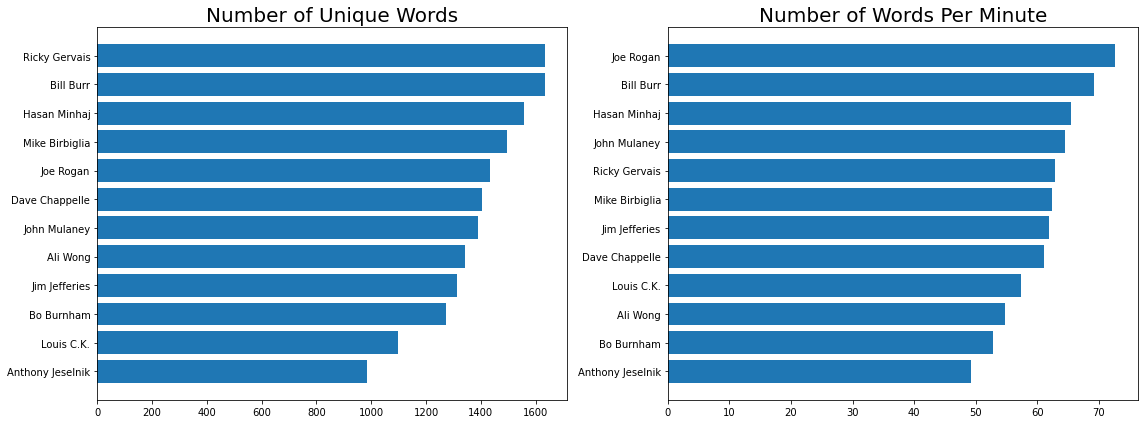

In [ ]:
# Let's plot our findings
import numpy as np

y_pos = np.arange(len(data_words))

plt.subplot(1, 2, 1)
plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.comedian)
plt.title('Number of Unique Words', fontsize=20)

plt.subplot(1, 2, 2)
plt.barh(y_pos, data_wpm_sort.words_per_minute, align='center')
plt.yticks(y_pos, data_wpm_sort.comedian)
plt.title('Number of Words Per Minute', fontsize=20)
plt.savefig('../figures/number_of_unique_word.png',
            transparent=True, 
            bbox_inches='tight',
            dpi=None,
            facecolor='w',
            edgecolor='w',
            orientation='portrait', #'landscape' 
            format=None,
            pad_inches=0.1, 
            metadata=None)


plt.tight_layout()
plt.show()

### Findings

* **Vocabulary**
   * Ricky Gervais (British comedy) and Bill Burr (podcast host) use a lot of words in their comedy
   * Louis C.K. (self-depricating comedy) and Anthony Jeselnik (dark humor) have a smaller vocabulary


* **Talking Speed**
   * Joe Rogan (blue comedy) and Bill Burr (podcast host) talk fast
   * Bo Burnham (musical comedy) and Anthony Jeselnik (dark humor) talk slow
   
Ali Wong is somewhere in the middle in both cases. Nothing too interesting here.

# 4. Amount of Profanity

### Analysis

In [ ]:
# Earlier I said we'd revisit profanity. Let's take a look at the most common words again.
Counter(words).most_common()

[('like', 12),
 ('im', 12),
 ('know', 12),
 ('just', 12),
 ('dont', 12),
 ('thats', 12),
 ('right', 12),
 ('people', 12),
 ('youre', 11),
 ('got', 10),
 ('time', 9),
 ('gonna', 8),
 ('think', 8),
 ('oh', 7),
 ('yeah', 7),
 ('said', 7),
 ('cause', 6),
 ('hes', 6),
 ('theyre', 6),
 ('say', 6),
 ('fucking', 6),
 ('shit', 5),
 ('day', 5),
 ('thing', 5),
 ('good', 5),
 ('fuck', 5),
 ('want', 5),
 ('going', 5),
 ('theres', 5),
 ('did', 4),
 ('didnt', 4),
 ('really', 4),
 ('dude', 3),
 ('guys', 3),
 ('ive', 3),
 ('little', 3),
 ('man', 3),
 ('life', 3),
 ('went', 3),
 ('ok', 2),
 ('lot', 2),
 ('gotta', 2),
 ('women', 2),
 ('tell', 2),
 ('joke', 2),
 ('school', 2),
 ('guy', 2),
 ('make', 2),
 ('come', 2),
 ('love', 2),
 ('dad', 2),
 ('mom', 2),
 ('hey', 2),
 ('white', 2),
 ('goes', 2),
 ('kids', 2),
 ('real', 2),
 ('old', 2),
 ('mean', 2),
 ('id', 2),
 ('wanna', 1),
 ('husband', 1),
 ('pregnant', 1),
 ('need', 1),
 ('god', 1),
 ('anthony', 1),
 ('grandma', 1),
 ('jokes', 1),
 ('okay', 1),
 ('b

In [ ]:
# Let's isolate just these bad words
data_bad_words = data.transpose()[['fucking', 'fuck', 'fck', 'shit', 'god','gods']]
data_profanity = pd.concat([data_bad_words.fucking + data_bad_words.fuck + data_bad_words.fck, data_bad_words.shit, data_bad_words.god + data_bad_words.gods], axis=1)
data_profanity.columns = ['f_word', 's_word', 'God']
data_profanity

f_word  s_word  God
ali          16      34   14
anthony      15       9    1
bill        107      64   17
bo            0       0    0
dave         65      46    8
hasan         0       0    0
jim         115      20    4
joe          66      40    9
john          4       6    3
louis        21      25    5
mike          0       0    1
ricky        60       6   19

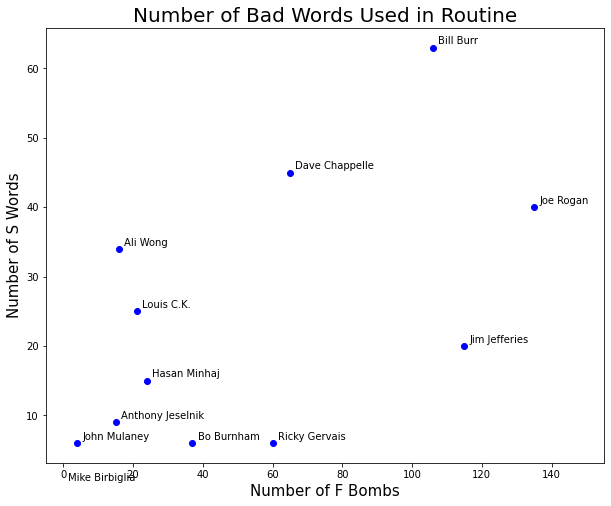

In [ ]:
# Let's create a scatter plot of our findings
plt.rcParams['figure.figsize'] = [10, 8]

for i, comedian in enumerate(data_profanity.index):
    x = data_profanity.f_word.loc[comedian]
    y = data_profanity.s_word.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+1.5, y+0.5, full_names[i], fontsize=10)
    plt.xlim(-5, 155) 
    
plt.title('Number of Bad Words Used in Routine', fontsize=20)
plt.xlabel('Number of F Bombs', fontsize=15)
plt.ylabel('Number of S Words', fontsize=15)
plt.savefig('../figures/number_of_bad_words.png',
            transparent=True, 
            bbox_inches='tight',
            dpi=None,
            facecolor='w',
            edgecolor='w',
            orientation='portrait', #'landscape' 
            format=None,
            pad_inches=0.1,
            metadata=None)

plt.show()

### Findings

* **Averaging 2 F-Bombs Per Minute!** - I don't like too much swearing, especially the f-word, which is probably why I've never heard of Bill Bur, Joe Rogan and Jim Jefferies.
* **Clean Humor** - It looks like profanity might be a good predictor of the type of comedy I like. Besides Ali Wong, my two other favorite comedians in this group are John Mulaney and Mike Birbiglia.

## Side Note

What was our goal for the EDA portion of our journey? **To be able to take an initial look at our data and see if the results of some basic analysis made sense.**

My conclusion - yes, it does, for a first pass. There are definitely some things that could be better cleaned up, such as adding more stop words or including bi-grams. But we can save that for another day. The results, especially the profanity findings, are interesting and make general sense, so we're going to move on.

As a reminder, the data science process is an interative one. It's better to see some non-perfect but acceptable results to help you quickly decide whether your project is a dud or not, instead of having analysis paralysis and never delivering anything.

**Alice's data science (and life) motto: Let go of perfectionism!**

## Additional Exercises

1. What other word counts do you think would be interesting to compare instead of the f-word and s-word? Create a scatter plot comparing them.